# 부산 탄소 발생현황 실습

## 1. 연도별 전기 가스 지역난방  - plot

In [27]:
import pandas as pd

import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [6]:
data = pd.read_excel('./부산탄소발생현황.xlsx')

In [7]:
data.head()

,연도,용도명,구명,동명,배출량원단위(전기),배출량원단위(가스),배출량원단위(지역난방)
0,2013,공동주택,사하구,괴정동,3.782,0.000,0.0
1,2013,-,연제구,연산동,0.200,0.000,0.0
2,2013,단독주택,부산진구,전포동,15.977,0.000,0.0
3,2013,단독주택,사하구,하단동,0.000,3.512,0.0
4,2013,단독주택,부산진구,부암동,0.000,5.569,0.0


In [8]:
data.tail()

,연도,용도명,구명,동명,배출량원단위(전기),배출량원단위(가스),배출량원단위(지역난방)
4995,2011,제1종근린생활시설,남구,대연동,0.000,131.588,0.0
4996,2011,제1종근린생활시설,중구,신창동2가,0.000,0.000,0.0
4997,2011,단독주택,북구,덕천동,4.808,0.000,0.0
4998,2011,단독주택,남구,문현동,3.052,0.000,0.0
4999,2011,단독주택,금정구,오륜동,4.843,0.000,0.0


In [18]:
year_dat =data.groupby(['연도'])['배출량원단위(전기)','배출량원단위(가스)','배출량원단위(지역난방)'].mean()

In [28]:
year_dat = year_dat.T

In [29]:
year_dat

연도,2011,2013
배출량원단위(전기),4.498492,7.166059
배출량원단위(가스),10.720585,9.215794
배출량원단위(지역난방),1.040511,3.106059


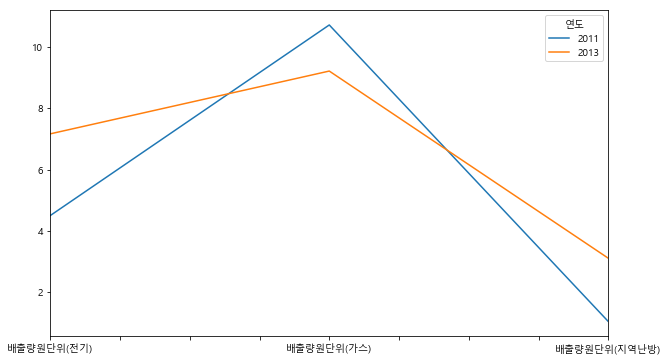

In [32]:
year_dat.plot(figsize =(10,6))
plt.show()

## 2. 구 별 전기 가스 지역난방  - folium

In [33]:
import folium

In [34]:
busan = pd.read_excel('./부산구청.xlsx')
busan = busan.set_index("항목")

In [39]:
busan

,위도,경도
항목,,
중구,35.106609,129.030064
서구,35.097924,129.022010
동구,35.129344,129.043314
영도구,35.091212,129.065700
부산진구,35.163087,129.051213
동래구,35.204841,129.081425
남구,35.136578,129.082053
북구,35.198325,128.987705
해운대구,35.163106,129.161390


In [35]:
for i in busan.index :
    lat = busan.loc[i,'위도']     #각각에 해당하는 위치정보를 가져옴
    lang = busan.loc[i,'경도']
    
    i = i.strip()
    print(lat,',',lang,',',i)   

35.106609 , 129.030064 , 중구
35.0979244 , 129.0220101 , 서구
35.129344 , 129.043314 , 동구
35.091212 , 129.0657 , 영도구
35.163087 , 129.051213 , 부산진구
35.204841 , 129.081425 , 동래구
35.1365783 , 129.0820528 , 남구
35.198325 , 128.987705 , 북구
35.163106 , 129.16139 , 해운대구
35.104451 , 128.97265 , 사하구
35.242974 , 129.089958 , 금정구
35.212231 , 128.978379 , 강서구
35.176504 , 129.077611 , 연제구
35.145615 , 129.1108891 , 수영구
35.1526399 , 128.9886233 , 사상구
35.2446 , 129.220059 , 기장군


In [36]:
area_dat = data.groupby(['구명'])['배출량원단위(전기)','배출량원단위(가스)','배출량원단위(지역난방)'].mean()

In [37]:
area_dat

,배출량원단위(전기),배출량원단위(가스),배출량원단위(지역난방)
구명,,,
강서구,1.637256,2.558892,9.093517
금정구,5.738754,5.152858,1.908517
기장군,2.046715,6.983860,1.741740
남구,3.382481,2.370365,1.494403
동구,13.437295,1.806143,0.552283
동래구,7.537049,3.725948,3.129478
부산진구,7.405469,17.551699,1.603519
북구,8.738386,17.966486,3.697347
사상구,6.423692,23.486733,1.280364


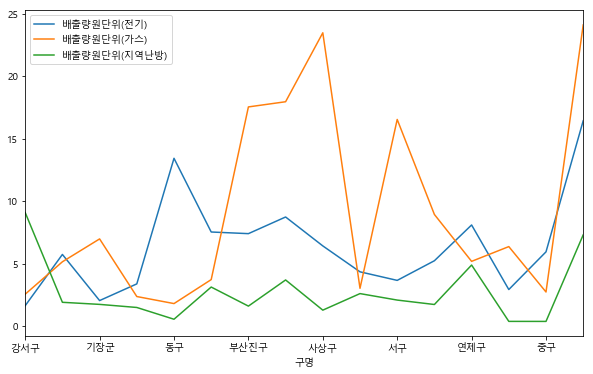

In [38]:
area_dat.plot(figsize =(10,6))
plt.show()

In [54]:
map = folium.Map(location=[35.150836, 129.053237],zoom_start=11)  


for i in busan.index :
    lat = busan.loc[i,'위도']     # 각각에 해당하는 위치정보를 가져옴
    lang = busan.loc[i,'경도']
    
    i = i.strip()
    
    folium.CircleMarker([lat,lang],     
                        radius =area_dat.loc[i,'배출량원단위(전기)'],
                        popup = round(area_dat.loc[i,'배출량원단위(전기)'],3),   
                        color = 'red',
                        fill = True).add_to(map)
    
    folium.CircleMarker([lat,lang],     
                        radius =area_dat.loc[i,'배출량원단위(가스)'],
                        popup = round(area_dat.loc[i,'배출량원단위(가스)'],3),   
                        color = 'blue',
                        fill = True).add_to(map)
    folium.CircleMarker([lat,lang],     
                        radius =area_dat.loc[i,'배출량원단위(지역난방)'],
                        popup = round(area_dat.loc[i,'배출량원단위(지역난방)'],3),   
                        color = 'green',
                        fill = True).add_to(map)

In [55]:
map